In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
url ='https://raw.githubusercontent.com/mdfarragher/DSC/master/LoadingData/CaliforniaHousing/california_housing.csv'

data = pd.read_csv(url)


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
print(pd.DataFrame(data))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

In [ ]:
X = data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
pd.DataFrame(X).describe()
print(pd.DataFrame(X))
##X.shape

       housing_median_age  total_rooms  total_bedrooms  population  \
0                    15.0       5612.0          1283.0      1015.0   
1                    19.0       7650.0          1901.0      1129.0   
2                    17.0        720.0           174.0       333.0   
3                    14.0       1501.0           337.0       515.0   
4                    20.0       1454.0           326.0       624.0   
...                   ...          ...             ...         ...   
16995                52.0       2217.0           394.0       907.0   
16996                36.0       2349.0           528.0      1194.0   
16997                17.0       2677.0           531.0      1244.0   
16998                19.0       2672.0           552.0      1298.0   
16999                52.0       1820.0           300.0       806.0   

       households  median_income  
0           472.0         1.4936  
1           463.0         1.8200  
2           117.0         1.6509  
3           226.0  

In [ ]:
y = data[['median_house_value']]
type(y)
print(pd.DataFrame(y))
type(y)
##y.shape

       median_house_value
0                 66900.0
1                 80100.0
2                 85700.0
3                 73400.0
4                 65500.0
...                   ...
16995            111400.0
16996             79000.0
16997            103600.0
16998             85800.0
16999             94600.0

[17000 rows x 1 columns]


pandas.core.frame.DataFrame

In [ ]:
# Extract the 'housing_median_age' column as a Pandas Series Y also made Series only can do 1 time
X = X['median_income']
y = y['median_house_value']

In [ ]:
# Get the column names
X_column_name = X.name
y_column_name = y.name

<class 'pandas.core.series.Series'>        <class 'pandas.core.series.Series'>


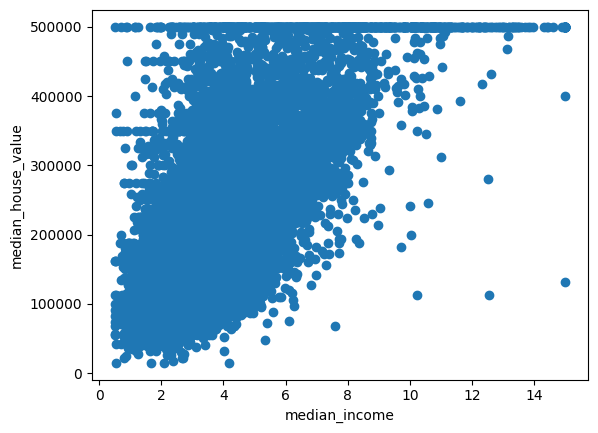

In [ ]:
import matplotlib.pyplot as plt







# Get the column names
X_column_name = X.name
y_column_name = y.name

print(type(X),"      ",type(y))


# Create the scatter plot
plt.scatter(X, y)
plt.xlabel(X_column_name)
plt.ylabel(y_column_name)

# Show the plot
plt.show()



In [ ]:
#I am going to scalethe data

from sklearn.preprocessing import StandardScaler

# Assuming X is a Pandas Series that is a 1D array that is why I need to reshape because Standard Scaler needs a 2 d array values stay the same just change structure for scaler
X = X.values.reshape(-1, 1)

std = StandardScaler()

X = std.fit_transform(X)

In [ ]:
y = y.values

In [ ]:
#Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
#Training Stage
from sklearn.linear_model import LinearRegression

# instatiate the learning algorithm (call it est for estimator)
est = LinearRegression()

# apply the training data to the algorithm
est.fit(X_train, y_train)

# apply the model to the new examples
y_pred = est.predict(X_test)

In [ ]:
#Showing Results
print(est.coef_)
print(est.intercept_)

[80420.68489957]
207611.5785917277


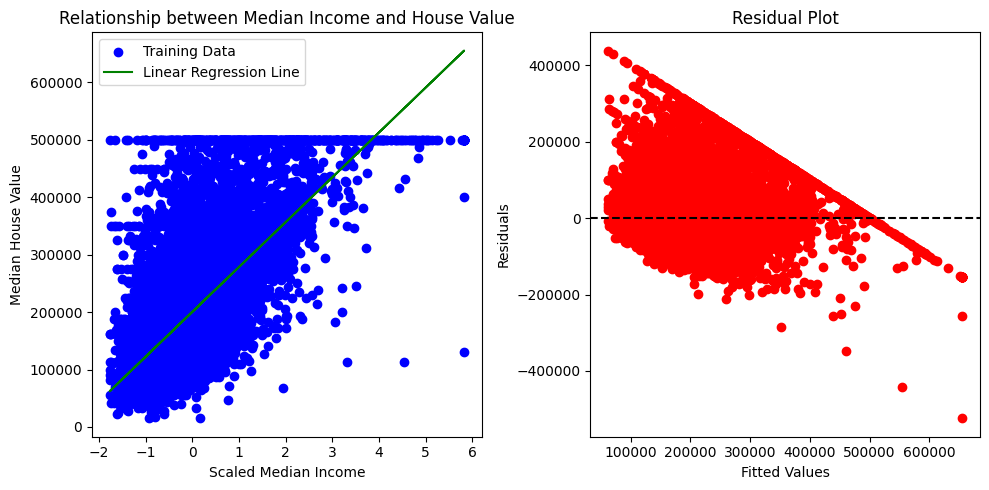

In [ ]:
#Visualizing Results#
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.plot(X_train, est.predict(X_train), color='green', label='Linear Regression Line')
plt.xlabel('Scaled Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.title('Relationship between Median Income and House Value')

# Residual plot to visualize the residuals
residuals = y_train - est.predict(X_train)
plt.subplot(1, 2, 2)
plt.scatter(est.predict(X_train), residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()

plt.show()

In [ ]:
print("Type of Y", type(y),"Type of X", type(X) )

Type of Y <class 'numpy.ndarray'> Type of X <class 'numpy.ndarray'>


In [ ]:
# Assuming 'X' is your NumPy array
mean_X = np.mean(X)  # Calculate the mean
std_X = np.std(X)    # Calculate the standard deviation

# Coefficient from your linear regression model
coefficient = 80176.76878913

# Calculate the real value of 1 unit after scaling
one_unit_real_value = coefficient * std_X

print("Mean of X:", mean_X)
print("Standard Deviation of X:", std_X)
print("The real value of 1 unit after scaling is:", one_unit_real_value)


Mean of X: -3.644666268134161e-16
Standard Deviation of X: 1.0
The real value of 1 unit after scaling is: 80176.76878913


In [ ]:
from sklearn.model_selection import KFold

# Define the number of folds (k)
k = 5

# Create a KFold object with k folds
kf = KFold(n_splits=k)

# Initialize lists to store results
coefs = []
intercepts = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    est = LinearRegression()
    est.fit(X_train, y_train)

    coefs.append(est.coef_)
    intercepts.append(est.intercept_)

# Display the average coefficients and intercepts
print("Average Coefficients:", np.mean(coefs, axis=0))
print("Average Intercept:", np.mean(intercepts))

Average Coefficients: [80079.21844401]
Average Intercept: 207279.43265380652


In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

coefs = []
intercepts = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    est = LinearRegression()
    est.fit(X_train, y_train)

    coefs.append(est.coef_)
    intercepts.append(est.intercept_)

# Display the average coefficients and intercepts
print("Average Coefficients:", np.mean(coefs, axis=0))
print("Average Intercept:", np.mean(intercepts))


Average Coefficients: [80243.39728648]
Average Intercept: 207300.9124084045


In [ ]:
from sklearn.model_selection import ShuffleSplit

# Define the number of splits and test size
n_splits = 5
test_size = 0.3

ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)

coefs = []
intercepts = []

for train_index, test_index in ss.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    est = LinearRegression()
    est.fit(X_train, y_train)

    coefs.append(est.coef_)
    intercepts.append(est.intercept_)

# Display the average coefficients and intercepts
print("Average Coefficients:", np.mean(coefs, axis=0))
print("Average Intercept:", np.mean(intercepts))


Average Coefficients: [80319.70102967]
Average Intercept: 207396.34992542234


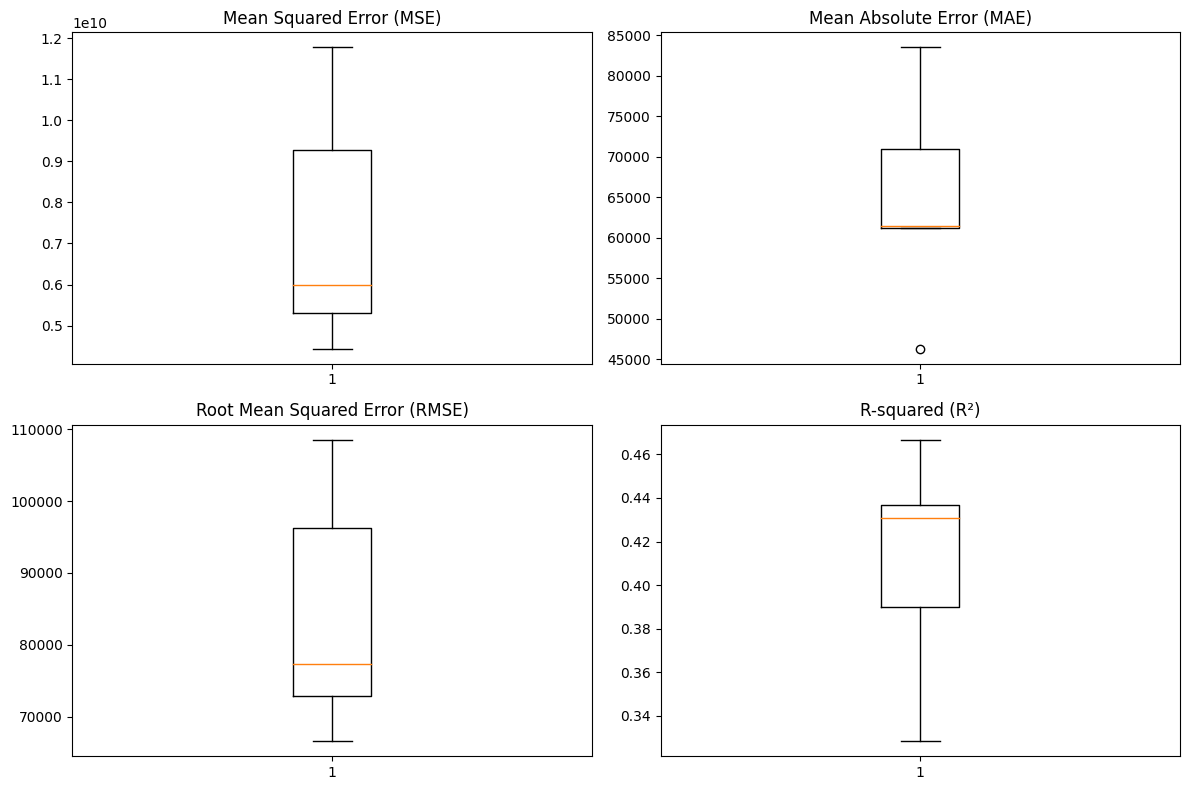

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create a single instance of LinearRegression outside the loop
est = LinearRegression()

# Initialize an empty matrix to store metrics for each fold
evaluation_metrics = []

# Loop over the K-Fold Cross-Validation splits
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model and make predictions
    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)

    # Calculate evaluation metrics for the current fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append the metrics for the current fold to the matrix
    evaluation_metrics.append([mse, mae, rmse, r2])

# Convert the list of lists to a numpy array for easy handling
evaluation_metrics = np.array(evaluation_metrics)

# Create box plots for the evaluation metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Box plot for MSE
axes[0, 0].boxplot(evaluation_metrics[:, 0])
axes[0, 0].set_title("Mean Squared Error (MSE)")

# Box plot for MAE
axes[0, 1].boxplot(evaluation_metrics[:, 1])
axes[0, 1].set_title("Mean Absolute Error (MAE)")

# Box plot for RMSE
axes[1, 0].boxplot(evaluation_metrics[:, 2])
axes[1, 0].set_title("Root Mean Squared Error (RMSE)")

# Box plot for R²
axes[1, 1].boxplot(evaluation_metrics[:, 3])
axes[1, 1].set_title("R-squared (R²)")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-23-42f2d3f9df65>:26: RuntimeWarning: overflow encountered in square
  mse = np.mean((y_train - y_pred) ** 2)


Slope (Coefficient): 1.1306431774437706e+249
Intercept: -2.196968648267967e+249


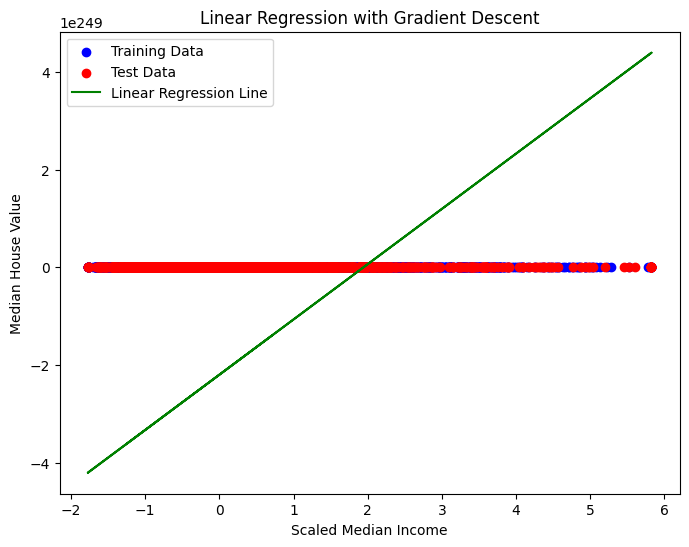

In [ ]:
# Define hyperparameters
learning_rate = 0.01
num_iterations = 100

# Initialize weights (slope) and bias (intercept)
slope = 0
intercept = 0

# Lists to store values for visualization
loss_history = []

# Perform gradient descent
for i in range(num_iterations):
    # Calculate predictions
    y_pred = slope * X_train + intercept

    # Calculate gradients
    d_slope = (-2 / len(X_train)) * np.sum(X_train * (y_train - y_pred))
    d_intercept = (-2 / len(X_train)) * np.sum(y_train - y_pred)

    # Update weights and bias
    slope -= learning_rate * d_slope
    intercept -= learning_rate * d_intercept

    # Calculate mean squared error for visualization
    mse = np.mean((y_train - y_pred) ** 2)
    loss_history.append(mse)

# Use the trained model to make predictions on the test set
y_pred_test = slope * X_test + intercept

# Showing Results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

# Plot the linear regression line and data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(X_train, slope * X_train + intercept, color='green', label='Linear Regression Line')
plt.xlabel('Scaled Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.show()